In [ ]:
# modified version of A many-to-one Vanilla Recurrent Neural Network.
#Reference
#https://victorzhou.com/blog/intro-to-rnns/

In [ ]:
train_data = {
  'good': True,
  'bad': False,
  'happy': True,
  'sad': False,
  'not good': False,
  'not bad': True,
  'not happy': False,
  'not sad': True,
  'very good': True,
  'very bad': False,
  'very happy': True,
  'very sad': False,
  'i am happy': True,
  'this is good': True,
  'i am bad': False,
  'this is bad': False,
  'i am sad': False,
  'this is sad': False,
  'i am not happy': False,
  'this is not good': False,
  'i am not bad': True,
  'this is not sad': True,
  'i am very happy': True,
  'this is very good': True,
  'i am very bad': False,
  'this is very sad': False,
  'this is very happy': True,
  'i am good not bad': True,
  'this is good not bad': True,
  'i am bad not good': False,
  'i am good and happy': True,
  'this is not good and not happy': False,
  'i am not at all good': False,
  'i am not at all bad': True,
  'i am not at all happy': False,
  'this is not at all sad': True,
  'this is not at all happy': False,
  'i am good right now': True,
  'i am bad right now': False,
  'this is bad right now': False,
  'i am sad right now': False,
  'i was good earlier': True,
  'i was happy earlier': True,
  'i was bad earlier': False,
  'i was sad earlier': False,
  'i am very bad right now': False,
  'this is very good right now': True,
  'this is very sad right now': False,
  'this was bad earlier': False,
  'this was very good earlier': True,
  'this was very bad earlier': False,
  'this was very happy earlier': True,
  'this was very sad earlier': False,
  'i was good and not bad earlier': True,
  'i was not good and not happy earlier': False,
  'i am not at all bad or sad right now': True,
  'i am not at all good or happy right now': False,
  'this was not happy and not good earlier': False,
}

test_data = {
  'this is happy': True,
  'i am good': True,
  'this is not happy': False,
  'i am not good': False,
  'this is not bad': True,
  'i am not sad': True,
  'i am very good': True,
  'this is very bad': False,
  'i am very sad': False,
  'this is bad not good': False,
  'this is good and happy': True,
  'i am not good and not happy': False,
  'i am not at all sad': True,
  'this is not at all good': False,
  'this is not at all bad': True,
  'this is good right now': True,
  'this is sad right now': False,
  'this is very bad right now': False,
  'this was good earlier': True,
  'i was not happy and not good earlier': False,
}

In [ ]:
 #Create the vocabulary.
vocab = list(set([w for text in train_data.keys() for w in text.split(' ')]))
print(vocab)
vocab_size = len(vocab)
print('%d unique words found' % vocab_size) # 18 unique words found

['or', 'at', 'is', 'was', 'this', 'i', 'and', 'not', 'am', 'good', 'right', 'all', 'bad', 'sad', 'very', 'happy', 'now', 'earlier']
18 unique words found


In [ ]:
# Assign indices to each word.
word_to_idx = { w: i for i, w in enumerate(vocab) }
idx_to_word = { i: w for i, w in enumerate(vocab) }
print(word_to_idx)
print(idx_to_word)
print(word_to_idx['good']) # 16 (this may change)
print(idx_to_word[0]) # sad (this may change)

{'or': 0, 'at': 1, 'is': 2, 'was': 3, 'this': 4, 'i': 5, 'and': 6, 'not': 7, 'am': 8, 'good': 9, 'right': 10, 'all': 11, 'bad': 12, 'sad': 13, 'very': 14, 'happy': 15, 'now': 16, 'earlier': 17}
{0: 'or', 1: 'at', 2: 'is', 3: 'was', 4: 'this', 5: 'i', 6: 'and', 7: 'not', 8: 'am', 9: 'good', 10: 'right', 11: 'all', 12: 'bad', 13: 'sad', 14: 'very', 15: 'happy', 16: 'now', 17: 'earlier'}
9
or


In [ ]:
import numpy as np

def createInputs(text):
  '''
  Returns an array of one-hot vectors representing the words
  in the input text string.
  - text is a string
  - Each one-hot vector has shape (vocab_size, 1)
  '''
  inputs = []
  for w in text.split(' '):
    v = np.zeros((vocab_size, 1))
    v[word_to_idx[w]] = 1
    inputs.append(v)
  return inputs

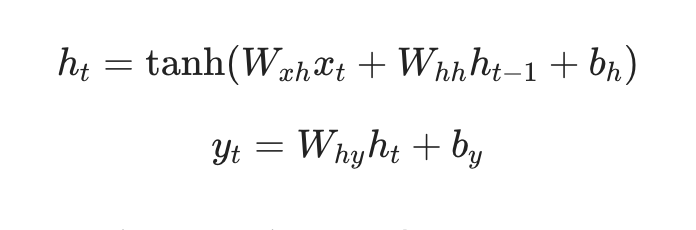

In [ ]:
import numpy as np
from numpy.random import randn

class RNN:


  def __init__(self, input_size, output_size, hidden_size=64):
    # Weights
    self.Whh = randn(hidden_size, hidden_size) / 1000
    self.Wxh = randn(hidden_size, input_size) / 1000
    self.Why = randn(output_size, hidden_size) / 1000

    # Biases
    self.bh = np.zeros((hidden_size, 1))
    self.by = np.zeros((output_size, 1))

  def forward(self, inputs):
    '''
    Perform a forward pass of the RNN using the given inputs.
    Returns the final output and hidden state.
    - inputs is an array of one hot vectors with shape (input_size, 1).
    '''
    h = np.zeros((self.Whh.shape[0], 1))

    self.last_inputs = inputs
    self.last_hs = { 0: h }
    print(self.Wxh.shape)
    print(self.Wxh)

    # Perform each step of the RNN
    for i, x in enumerate(inputs):

      h = np.tanh(self.Wxh @ x + self.Whh @ h + self.bh)
      self.last_hs[i + 1] = h

    # Compute the output
    y = self.Why @ h + self.by

    return y, h

  def backprop(self, d_y, learn_rate=2e-2):
    '''
    Perform a backward pass of the RNN.
    - d_y (dL/dy) has shape (output_size, 1).
    - learn_rate is a float.
    '''
    n = len(self.last_inputs)

    # Calculate dL/dWhy and dL/dby.
    d_Why = d_y @ self.last_hs[n].T
    d_by = d_y

    # Initialize dL/dWhh, dL/dWxh, and dL/dbh to zero.
    d_Whh = np.zeros(self.Whh.shape)
    d_Wxh = np.zeros(self.Wxh.shape)
    d_bh = np.zeros(self.bh.shape)

    # Calculate dL/dh for the last h.
    # dL/dh = dL/dy * dy/dh
    d_h = self.Why.T @ d_y

    # Backpropagate through time.
    for t in reversed(range(n)):
      # An intermediate value: dL/dh * (1 - h^2)
      temp = ((1 - self.last_hs[t + 1] ** 2) * d_h)

      # dL/db = dL/dh * (1 - h^2)
      d_bh += temp

      # dL/dWhh = dL/dh * (1 - h^2) * h_{t-1}
      d_Whh += temp @ self.last_hs[t].T

      # dL/dWxh = dL/dh * (1 - h^2) * x
      d_Wxh += temp @ self.last_inputs[t].T

      # Next dL/dh = dL/dh * (1 - h^2) * Whh
      d_h = self.Whh @ temp

    # Clip to prevent exploding gradients.
    for d in [d_Wxh, d_Whh, d_Why, d_bh, d_by]:
      np.clip(d, -1, 1, out=d)

    # Update weights and biases using gradient descent.
    self.Whh -= learn_rate * d_Whh
    self.Wxh -= learn_rate * d_Wxh
    self.Why -= learn_rate * d_Why
    self.bh -= learn_rate * d_bh
    self.by -= learn_rate * d_by

In [ ]:
# ...

def softmax(xs):
  # Applies the Softmax Function to the input array.
  return np.exp(xs) / sum(np.exp(xs))

# Initialize our RNN!
rnn = RNN(vocab_size, 2)

inputs = createInputs('i am very good')
# print(inputs)
out, h = rnn.forward(inputs)
probs = softmax(out)
print(probs) # [[0.50000095], [0.49999905]]

(64, 18)
[[ 5.89379976e-04 -1.96032913e-04  1.57414961e-03 ...  1.21904363e-03
  -1.56541323e-03  8.06146379e-04]
 [-1.40343762e-03 -3.66246247e-04  1.36947433e-03 ... -1.66595553e-04
   6.05161683e-04  3.26717581e-04]
 [-6.03272751e-04 -3.19712412e-04 -1.06441121e-03 ... -8.76784846e-04
   9.00429963e-04  3.75470388e-04]
 ...
 [ 1.10778336e-03  1.26647392e-03 -7.05879989e-04 ... -1.27770813e-03
   4.93272087e-04  4.76139418e-05]
 [ 5.60361598e-04  4.07256428e-04 -1.06880901e-03 ... -9.00969012e-05
  -6.16105133e-04  4.16558364e-05]
 [-3.96902080e-04 -1.29489001e-04 -1.14068785e-03 ... -2.90906035e-04
  -5.02104623e-04 -1.28179176e-03]]
[[0.50000014]
 [0.49999986]]


In [ ]:
import random

def processData(data, backprop=True):
  '''
  Returns the RNN's loss and accuracy for the given data.
  - data is a dictionary mapping text to True or False.
  - backprop determines if the backward phase should be run.
  '''
  items = list(data.items())
  random.shuffle(items)

  loss = 0
  num_correct = 0

  for x, y in items:
    inputs = createInputs(x)
    target = int(y)

    # Forward
    out, _ = rnn.forward(inputs)
    probs = softmax(out)

    # Calculate loss / accuracy
    loss -= np.log(probs[target])
    num_correct += int(np.argmax(probs) == target)

    if backprop:
      # Build dL/dy
      d_L_d_y = probs
      d_L_d_y[target] -= 1

      # Backward
      rnn.backprop(d_L_d_y)

  return loss / len(data), num_correct / len(data)

In [ ]:
# Training loop
for epoch in range(1000):
  train_loss, train_acc = processData(train_data)

  if epoch % 100 == 99:
    print('--- Epoch %d' % (epoch + 1))
    print('Train:\tLoss %.3f | Accuracy: %.3f' % (train_loss, train_acc))

    test_loss, test_acc = processData(test_data, backprop=False)
    print('Test:\tLoss %.3f | Accuracy: %.3f' % (test_loss, test_acc))

--- Epoch 100
Train:	Loss 0.688 | Accuracy: 0.552
Test:	Loss 0.698 | Accuracy: 0.500
--- Epoch 200
Train:	Loss 0.671 | Accuracy: 0.655
Test:	Loss 0.718 | Accuracy: 0.450
--- Epoch 300
Train:	Loss 0.517 | Accuracy: 0.759
Test:	Loss 0.750 | Accuracy: 0.500
--- Epoch 400
Train:	Loss 0.914 | Accuracy: 0.552
Test:	Loss 1.098 | Accuracy: 0.400
--- Epoch 500
Train:	Loss 0.452 | Accuracy: 0.793
Test:	Loss 0.405 | Accuracy: 0.700
--- Epoch 600
Train:	Loss 0.094 | Accuracy: 0.966
Test:	Loss 0.090 | Accuracy: 1.000
--- Epoch 700
Train:	Loss 0.007 | Accuracy: 1.000
Test:	Loss 0.010 | Accuracy: 1.000
--- Epoch 800
Train:	Loss 0.004 | Accuracy: 1.000
Test:	Loss 0.008 | Accuracy: 1.000
--- Epoch 900
Train:	Loss 0.002 | Accuracy: 1.000
Test:	Loss 0.008 | Accuracy: 1.000
--- Epoch 1000
Train:	Loss 0.002 | Accuracy: 1.000
Test:	Loss 0.006 | Accuracy: 1.000
